<a href="https://colab.research.google.com/github/Igorps023/Music_Stream/blob/main/Music_Stream_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ETL e Análise Exploratória Streaming de Música

# Código

In [ ]:
# Desmontar o Google Drive (se já estiver montado)
from google.colab import drive
drive.flush_and_unmount()

# Montar o Google Drive novamente
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# instalar as dependências
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.3.1//spark-3.3.1-bin-hadoop2.tgz
!tar xf spark-3.3.1-bin-hadoop2.tgz
!pip install -q findspark

In [ ]:
#
#!pip install pyspark

In [ ]:
#from pyspark.sql import SparkSession

# Criar uma instância do SparkSession
#spark = SparkSession.builder.master("local").appName("NomeDoApp").getOrCreate()

# Agora você pode utilizar o Spark
# ...

In [ ]:
# configurar as variáveis de ambiente
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.1-bin-hadoop2.7"

In [ ]:
#importando biblioteca para reconhecer o pyspark
import findspark
findspark.init('spark-3.3.1-bin-hadoop2')

In [ ]:
#escrevendo um arquivo no nosso Drive para testar o mapeamento
with open('/content/drive/My Drive/Colab Notebooks/testando_mount.txt', 'w') as f:
    f.write('content')

In [ ]:
#Criando nossa primeira Sessão com o SparkSession
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Aplicação Pyspark Music_Stream Process_1") \
    .config('spark.ui.port', '4050') \
    .getOrCreate()	

In [ ]:
spark

In [ ]:
#instalar extensão kaggle
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import json 
import os
from pathlib import Path

# your api key
api_key = {
'username':"igorpereirasilva" ,
'key':"932cad93df082ec0266d416f7e420cdd"}

# uses pathlib Path
kaggle_path = Path('/root/.kaggle')
os.makedirs(kaggle_path, exist_ok=True)

# opens file and dumps python dict to json object 
with open (kaggle_path/'kaggle.json', 'w') as handl:
    json.dump(api_key,handl)

os.chmod(kaggle_path/'kaggle.json', 600)  

In [ ]:
#importar biblioteca kaggle
import kaggle

In [ ]:
#pathway até o dataset
kaggle.api.authenticate()
kaggle.api.dataset_download_files('undefinenull/million-song-dataset-spotify-lastfm', path='./data', unzip=True)

#URL Dataset
#https://www.kaggle.com/datasets/undefinenull/million-song-dataset-spotify-lastfm

# Leitura Datasets

In [ ]:
# ler o arquivo JSON baixado do Kaggle
music_info = spark.read.csv("./data/Music Info.csv", sep=",", header=True)
listening_history = spark.read.csv("./data/User Listening History.csv", sep=",", header=True)

# Type Dataframe

In [ ]:
music_info

DataFrame[track_id: string, name: string, artist: string, spotify_preview_url: string, spotify_id: string, tags: string, genre: string, year: string, duration_ms: string, danceability: string, energy: string, key: string, loudness: string, mode: string, speechiness: string, acousticness: string, instrumentalness: string, liveness: string, valence: string, tempo: string, time_signature: string]

In [ ]:
listening_history

DataFrame[track_id: string, user_id: string, playcount: string]

# Numero Linhas e Colunas

In [ ]:
#numero colunas e linhas
num_rows = music_info.count()
num_cols = len(music_info.columns)

In [ ]:
print('Shape: ({}, {})'.format(num_rows, num_cols))

Shape: (50683, 21)


# Descricao Colunas

In [ ]:
#colunas
music_info.columns

['track_id',
 'name',
 'artist',
 'spotify_preview_url',
 'spotify_id',
 'tags',
 'genre',
 'year',
 'duration_ms',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature']

In [ ]:
#colunas
listening_history.columns

['track_id', 'user_id', 'playcount']

# Preview Tabela

In [ ]:
music_info.show(20, truncate=False)

+------------------+-----------------+---------------------+-----------------------------------------------------------------------------------------------------------+----------------------+------------------------------------------------------------------------------------------------------+-----+----+-----------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+
|track_id          |name             |artist               |spotify_preview_url                                                                                        |spotify_id            |tags                                                                                                  |genre|year|duration_ms|danceability|energy|key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|valence|tempo  |time_signature|
+------------------+-----------------+---------------------+----------------------------------------------------------------

In [ ]:
test = listening_history.sort("user_id").show(20, truncate=False)

+------------------+----------------------------------------+---------+
|track_id          |user_id                                 |playcount|
+------------------+----------------------------------------+---------+
|TRQEBOU128F425D087|00000b722001882066dff9d2da8a775658053ea0|1        |
|TRBCDMC128F1452976|00001638d6189236866af9bbf309ae6c2347ffdc|1        |
|TRHVDTF128F428D64C|0000175652312d12576d9e6b84f600caa24c4715|1        |
|TRTPXAP12903CA1A14|00001cf0dce3fb22b0df0f3a1d9cd21e38385372|2        |
|TRZPDFG128F92FDEF5|00001cf0dce3fb22b0df0f3a1d9cd21e38385372|2        |
|TRVRIBZ128F426BF71|00001cf0dce3fb22b0df0f3a1d9cd21e38385372|1        |
|TRGEIDA128F933B4B8|00001cf0dce3fb22b0df0f3a1d9cd21e38385372|1        |
|TRPUGUW128F426BF6F|00001cf0dce3fb22b0df0f3a1d9cd21e38385372|1        |
|TREZYWT128F93191B7|00001cf0dce3fb22b0df0f3a1d9cd21e38385372|2        |
|TRKABMK128F426BF72|00001cf0dce3fb22b0df0f3a1d9cd21e38385372|2        |
|TRIYKXW128F92FDF08|00001cf0dce3fb22b0df0f3a1d9cd21e38385372|2  

# Schema

In [ ]:
#Schema Tabela
#Podemos notar que todos os dados foram armazenados como string, faremos alteracoes futuramente para melhor performance
listening_history.printSchema()

root
 |-- track_id: string (nullable = true)
 |-- user_id: string (nullable = true)
 |-- playcount: string (nullable = true)



In [ ]:
#Schema Tabela
#Podemos notar que todos os dados foram armazenados como string, faremos alteracoes futuramente para melhor performance
music_info.printSchema()

root
 |-- track_id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- artist: string (nullable = true)
 |-- spotify_preview_url: string (nullable = true)
 |-- spotify_id: string (nullable = true)
 |-- tags: string (nullable = true)
 |-- genre: string (nullable = true)
 |-- year: string (nullable = true)
 |-- duration_ms: string (nullable = true)
 |-- danceability: string (nullable = true)
 |-- energy: string (nullable = true)
 |-- key: string (nullable = true)
 |-- loudness: string (nullable = true)
 |-- mode: string (nullable = true)
 |-- speechiness: string (nullable = true)
 |-- acousticness: string (nullable = true)
 |-- instrumentalness: string (nullable = true)
 |-- liveness: string (nullable = true)
 |-- valence: string (nullable = true)
 |-- tempo: string (nullable = true)
 |-- time_signature: string (nullable = true)



# Verificando a existência de registros nulos

In [ ]:
def check_nulls(dataframe, name) -> None:
    '''
    Verifica e exibe a quantidade de valores nulos em cada coluna do dataframe.

    :param dataframe: DataFrame
        Dataframe a ser analisado.
    :param name: str
        Nome identificando o dataframe para exibição na saída.
    '''
    print(f'\n{name.upper()} { "-" * (100 - len(name))}')
    for coluna in dataframe.columns:
        qty = dataframe.filter(dataframe[coluna].isNull()).count()
        if qty >= 1:
            print(f'{coluna}: {qty}')



    from pyspark.sql.functions import col

    def check_empty(dataframe, name) -> None:
      '''
      Verifica e exibe a quantidade de valores nulos em cada coluna do dataframe.

      :param dataframe: DataFrame
          Dataframe a ser analisado.
      :param name: str
          Nome identificando o dataframe para exibição na saída.
      '''
      print(f'\n{name.upper()} { "-" * (100 - len(name))}')
      for coluna in dataframe.columns:
          qty = dataframe.filter(col(coluna).isNull() | (col(coluna) == "")).count()
          if qty >= 1:
            print(f'{coluna}: {qty}')

In [ ]:
#Utilizando a def
check_nulls(listening_history, "listening_history")
check_nulls(music_info,"music_info")


LISTENING_HISTORY -----------------------------------------------------------------------------------

MUSIC_INFO ------------------------------------------------------------------------------------------
tags: 1127
genre: 28335


In [ ]:
#Podemos verificar que o historico de musicas nao apresenta nenhum valor nulo, por se tratar de uma tabela fato
#Verificaremos posteriormente se todos os itens da Fato estao presentes nas tabelas dimensao
#Por questao de boas praticas em modelagem de dados

# Verificando a existência de linhas duplicadas

In [ ]:
def check_duplicates(dataframe, fields) -> None:
    '''
    Verifica e exibe uma amostra de 5 registros duplicados com base em um ou mais campos especificados.

    :param dataframe: DataFrame
        Dataframe a ser analisado.
    :param fields: str ou list de str
        Nome do campo ou lista de campos a serem usados como referência para identificar duplicatas.
    '''
    duplicate = dataframe.groupBy(fields) \
        .agg(count('*').alias('qty')) \
        .where(col('qty') > 1) \
        .orderBy(desc('qty'))   
    duplicate.show(5, truncate=False)

In [ ]:
from pyspark.sql.functions import col, count, desc

def check_duplicates(dataframe, fields) -> None:
    '''
    Verifica e exibe uma amostra de 5 registros duplicados com base em um ou mais campos especificados.

    :param dataframe: DataFrame
        Dataframe a ser analisado.
    :param fields: str ou list de str
        Nome do campo ou lista de campos a serem usados como referência para identificar duplicatas.
    '''
    duplicates = dataframe.groupBy(fields) \
        .agg(count('*').alias('qty')) \
        .where(col('qty') > 1) \
        .orderBy(desc('qty'))
    return duplicates   
    #duplicates.show(5, truncate=False)

In [ ]:
#check_duplicates(music_info, 'spotify_preview_url')
#for column in music_info.columns:
#    check_duplicates(music_info, column)

for column in music_info.columns:
    duplicates = check_duplicates(music_info, column)
    duplicates.show(20, truncate=False)

+--------+---+
|track_id|qty|
+--------+---+
+--------+---+

+----+---+
|name|qty|
+----+---+
+----+---+

+------------------+---+
|artist            |qty|
+------------------+---+
|The Rolling Stones|132|
|Radiohead         |111|
|Autechre          |105|
|Tom Waits         |100|
|Bob Dylan         |98 |
|The Cure          |94 |
|Metallica         |85 |
|Johnny Cash       |84 |
|Nine Inch Nails   |83 |
|Sonic Youth       |81 |
|In Flames         |76 |
|Elliott Smith     |76 |
|Iron Maiden       |76 |
|Boards of Canada  |75 |
|Mogwai            |75 |
|Amorphis          |74 |
|Korn              |72 |
|Animal Collective |70 |
|Beastie Boys      |70 |
|Foo Fighters      |70 |
+------------------+---+
only showing top 20 rows

+-----------------------------------------------------------------------------------------------------------+---+
|spotify_preview_url                                                                                        |qty|
+---------------------------------------

# Outra maneira de chegar ao mesmo resultado de colunas com valores duplicados

In [ ]:
#Another way to achieve the same result
from pyspark.sql.functions import col, count, desc, row_number
from pyspark.sql.window import Window

def check_duplicates(dataframe):
    '''
    Verifica e exibe uma amostra de 5 registros duplicados para cada coluna com base em um DataFrame.

    :param dataframe: DataFrame
        DataFrame a ser analisado.
    '''
    columns = dataframe.columns

    window_spec = Window.partitionBy().orderBy(desc('qty'))

    for column in columns:
        duplicates = dataframe.groupBy(column) \
            .agg(count('*').alias('qty')) \
            .where(col('qty') > 1) \
            .orderBy(desc('qty'))

        duplicates = duplicates.withColumn('row_number', row_number().over(window_spec))
        duplicates = duplicates.filter(col('row_number') <= 5)

        print(f"Column: {column}")
        duplicates.show(truncate=False)
        print('\n')

# Usage example:
check_duplicates(music_info)

Column: track_id
+--------+---+----------+
|track_id|qty|row_number|
+--------+---+----------+
+--------+---+----------+



Column: name
+----+---+----------+
|name|qty|row_number|
+----+---+----------+
+----+---+----------+



Column: artist
+------------------+---+----------+
|artist            |qty|row_number|
+------------------+---+----------+
|The Rolling Stones|132|1         |
|Radiohead         |111|2         |
|Autechre          |105|3         |
|Tom Waits         |100|4         |
|Bob Dylan         |98 |5         |
+------------------+---+----------+



Column: spotify_preview_url
+-----------------------------------------------------------------------------------------------------------+---+----------+
|spotify_preview_url                                                                                        |qty|row_number|
+-----------------------------------------------------------------------------------------------------------+---+----------+
|https://p.scdn.co/mp3-prev

# Vamos verificar o motivo de algumas linhas estarem duplicadas na coluna 'spotify_id'


In [ ]:
# Exemplo
music_info_filtro = music_info.filter("spotify_id = '1Ntzk4JoxcAsrWi73MoBjr'")

In [ ]:
# Note: O nome da musica na coluna 'name' foi digitado incorretamente
music_info_filtro.show()

+------------------+---------+-------------------+--------------------+--------------------+--------------------+-----+----+-----------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+------+--------------+
|          track_id|     name|             artist| spotify_preview_url|          spotify_id|                tags|genre|year|duration_ms|danceability|energy|key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|valence| tempo|time_signature|
+------------------+---------+-------------------+--------------------+--------------------+--------------------+-----+----+-----------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+------+--------------+
|TRXUYQW128F42370DB|hHallmark|Broken Social Scene|https://p.scdn.co...|1Ntzk4JoxcAsrWi73...|alternative, indi...| Rock|2004|     233706|       0.523| 0.583|  0| -10.694|   1|     0.0434|      0.0879|           0.109|   0.144|  0.172

# Verificar o total de linhas com duplicacao da coluna 'spotify_id'

In [ ]:
from pyspark.sql.functions import count

# Group the DataFrame by 'spotify_id' and count the occurrences
duplicate_counts = music_info.groupBy('spotify_id').agg(count('*').alias('count'))

# Filter the DataFrame to keep only rows where count > 1
duplicate_rows = music_info.join(duplicate_counts, on='spotify_id').filter('count > 1')

# Show the duplicate rows DataFrame
duplicate_rows.sort('name').show(20, truncate=False)

+----------------------+------------------+--------------------------+-------------------+-----------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------+-----+----+-----------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+-----+
|spotify_id            |track_id          |name                      |artist             |spotify_preview_url                                                                                        |tags                                                                                                                                                         |genre|year|duration_ms|danceability|energy|key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|valence|tempo  |time_signa

# Para este projeto, mantive somente a primeira ocorrencia do 'spotify_id' por conta de representar um "erro" de digitacao/forma alternativa de nome para a mesma musica

In [ ]:
music_info_unique = music_info.dropDuplicates(subset=['spotify_id'])

In [ ]:
music_info_unique.count()

50674

Resultado esperado obtido: Retiramos as 9 linhas que encontravam-se duplicadas no dataset
Basta olhar o dataframe abaixo e verificar que a musica 3 AM somente aparece uma vez

In [ ]:
music_info_unique.filter("artist = 'Matchbox Twenty'").sort("name").show()

+------------------+--------------+---------------+--------------------+--------------------+--------------------+-----+----+-----------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+
|          track_id|          name|         artist| spotify_preview_url|          spotify_id|                tags|genre|year|duration_ms|danceability|energy|key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|valence|  tempo|time_signature|
+------------------+--------------+---------------+--------------------+--------------------+--------------------+-----+----+-----------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+
|TRGGALK12903CB68E5|          3 AM|Matchbox Twenty|https://p.scdn.co...|5vYA1mW9g2Coh1HUF...|rock, alternative...| null|1996|     225946|       0.521| 0.673|  8|  -8.685|   1|     0.0284|     0.00573|             0.0|    0.12|

#Modelagem Tabelas Fato e Dimensão

Conforme o diagrama proposto, este projeto utilizará 3 tabelas
*   1 tabela fato - Todos os registros de músicas escutadas por usuário
*   1 tabela dimensão - Todos os usuários
*   1 tabela dimensão - Todas as musicas/artista

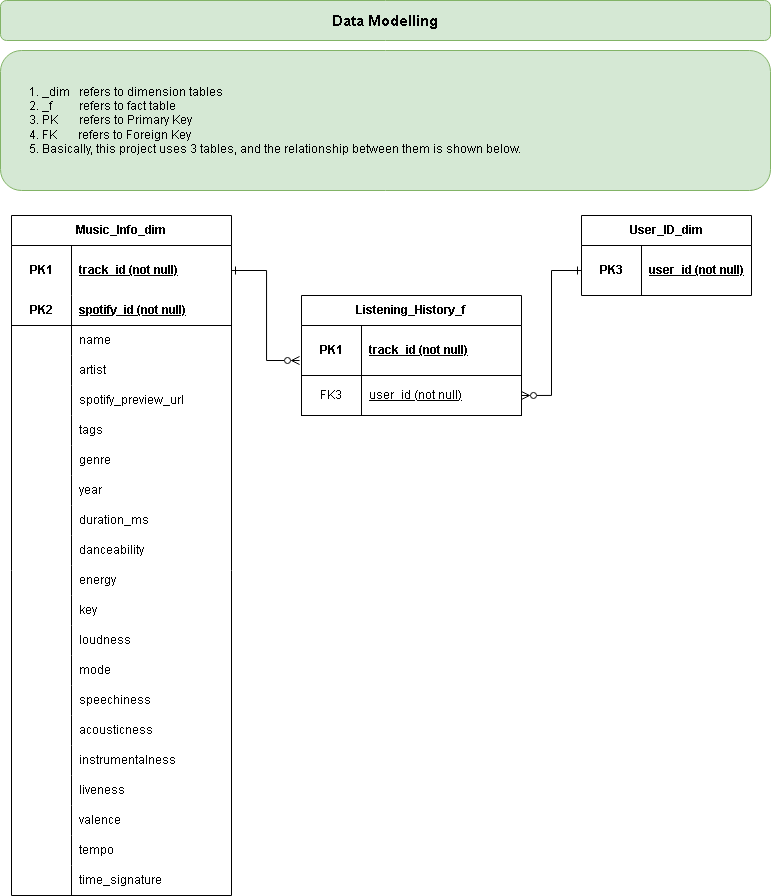

# Junção de tabelas (LEFT OUTER JOIN)

In [ ]:
listening_history.count()

9711301

In [ ]:
listening_history = listening_history.join(music_info.select("track_id", "name", "artist"), on=["track_id"], how="left")

In [ ]:
listening_history.show(30)

+------------------+--------------------+---------+--------------------+--------------------+
|          track_id|             user_id|playcount|                name|              artist|
+------------------+--------------------+---------+--------------------+--------------------+
|TRIRLYL128F42539D1|b80344d063b5ccb32...|        1|Nothing From Nothing|       Billy Preston|
|TRFUPBA128F934F7E1|b80344d063b5ccb32...|        1|       Paper Gangsta|           Lady Gaga|
|TRLQPQJ128F42AA94F|b80344d063b5ccb32...|        1|                 Soy|         Gipsy Kings|
|TRTUCUY128F92E1D24|b80344d063b5ccb32...|        1|      Stacked Actors|        Foo Fighters|
|TRHDDQG12903CB53EE|b80344d063b5ccb32...|        1|Heaven's Gonna Bu...|Thievery Corporation|
|TRGRDEC128F423C07D|b80344d063b5ccb32...|        1|      Let It Be Sung|        Jack Johnson|
|TRRYCBO128F932A2C7|b80344d063b5ccb32...|        1|          Love Shack|          The B-52's|
|TRUTULC128F4293712|b80344d063b5ccb32...|        1|      Gim